# 120 Years of Olympic History
## by Nikhil Kumar

## Preliminary Wrangling

> This dataset contains data for all Olympic Games from Athens 1896 to Rio 2016 and was retrieved from [here](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). There are over 200,000 rows that contain information on each individual athlete including their gender, medal, country, sport, etc. The data encompasses both the summer and winter games. There is a plethora of valuable data in this dataset that can pave the way to discovering insights of how the Olympics have changed over the years. Let's wrangle this data and get started!

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Assessing the Data

In [3]:
df.shape

(271116, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.Age.unique()

array([24., 23., 34., 21., 25., 27., 31., 33., 18., 26., 22., 30., 32.,
       28., 54., 20., 17., 43., 47., 29., 41., 45., 49., 53., 57., nan,
       19., 38., 35., 16., 37., 15., 42., 46., 40., 36., 14., 39., 48.,
       52., 44., 55., 50., 71., 63., 51., 58., 13., 60., 75., 65., 56.,
       64., 68., 84., 12., 72., 59., 61., 70., 74., 62., 67., 69., 73.,
       66., 11., 76., 88., 96., 80., 10., 81., 77., 97.])

In [6]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [7]:
df.duplicated().sum()

1385

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**Quality Issues**

- The values in the `ID` column should be string objects rather than integers
- The `Sex`, `Season`, and `Medal` columns should be converted to categorical datatypes
- The `Age` column contains float values that should be integers
- There are many duplicated rows
- There are many null values in the `Height` column
- There are many null values in the `Weight` column
- The values in the `Height` and `Weight` column should be ints rather than floats with ".0" at the end

**Tidiness Issues**

- The `NOC` and `Games` columns contain redundant information and are not needed

## Cleaning the Data

## Quality Issues

In [9]:
# make a copy of the dataset for cleaning
df_clean = df.copy()

**The values in the `ID` column should be string objects rather than integers**

***Define***

> Convert the integers in the `ID` column to string objects.

***Code***

In [10]:
df_clean['ID'] = df_clean['ID'].astype('str')

***Test***

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  object 
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.0+ MB


**The `Sex`, `Season`, and `Medal` columns should be converted to categorical datatypes.**

***Define***

> Convert these columns to hold categorical datatypes and make sure that the `Medal` column holds ordinal categorical values.

***Code***

In [12]:
# convert the Sex column
genders = ['M','F']
sex_dtype = pd.api.types.CategoricalDtype(categories = genders)
df_clean['Sex'] = df_clean['Sex'].astype(sex_dtype)

# convert the Season column
seasons = ['Summer', 'Winter']
season_dtype = pd.api.types.CategoricalDtype(categories = seasons)
df_clean['Season'] = df_clean['Season'].astype(season_dtype)

# convert the Medal column
medals = ['Bronze', 'Silver', 'Gold']
medal_dtype = pd.api.types.CategoricalDtype(ordered = True, categories = medals)
df_clean['Medal'] = df_clean['Medal'].astype(medal_dtype)

***Test***

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      271116 non-null  object  
 1   Name    271116 non-null  object  
 2   Sex     271116 non-null  category
 3   Age     261642 non-null  float64 
 4   Height  210945 non-null  float64 
 5   Weight  208241 non-null  float64 
 6   Team    271116 non-null  object  
 7   NOC     271116 non-null  object  
 8   Games   271116 non-null  object  
 9   Year    271116 non-null  int64   
 10  Season  271116 non-null  category
 11  City    271116 non-null  object  
 12  Sport   271116 non-null  object  
 13  Event   271116 non-null  object  
 14  Medal   39783 non-null   category
dtypes: category(3), float64(3), int64(1), object(8)
memory usage: 25.6+ MB


**The `Age` column contains float values that should be integers**

***Define***

> First, delete all the unneeded null values. Slice off the ".0" from the end of each float using string slicing and then convert this result into an integer.

***Code***

In [14]:
# delete all null rows from column
df_clean = df_clean[df_clean['Age'].notnull()]

# convert values to ints
df_clean.loc[:,'Age'] = df_clean['Age'].astype('str').str[:-2].astype('int')


***Test***

In [15]:
df_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**There are many duplicated rows.**

***Define***

> Delete all duplicated rows.

***Code***

In [16]:
# drop the duplicate rows
df_clean = df_clean.drop_duplicates()
# reset the index of the dataframe
df_clean.reset_index(drop = True, inplace = True)

***Test***

In [17]:
df_clean.duplicated().sum()

0

**There are many null values in the `Height` column.**

***Define***

> Replace these null values with with the average height value for each gender of athletes in that given year. Dictionaries holding this information for each year and gender must first be made to facilitate this process. A function will then be applied to the dataframe to replace the null values with the appropriate data.

***Code***

In [18]:
# create empty dictionaries for males and females
years = df_clean.Year.unique()
male_heights = {}
female_heights = {}

# iterate through each year in the dataset
for year in years:
    frame = df_clean.query("Year == @year").groupby(['Year','Sex']).mean()
    
    # store average male height and round to nearest whole number
    male_avg = frame['Height'].values[0]
    male_avg = round(male_avg, 0)
    
    # store average female height and round to nearest whole number
    female_avg = frame['Height'].values[1]
    female_avg = round(female_avg, 0)
    
    # add values to the corresponding dictionary
    male_heights[year] = male_avg
    female_heights[year] = female_avg

In [19]:
def fill_heights(year_col, height_col, sex_col):
   
    # pick out null values
    if math.isnan(height_col):        
        year = year_col
        
        # fill in null with the appropriate male height
        if sex_col == 'M':
            height_col = male_heights[year]
            
        # fill in null with the appropriate female height
        elif sex_col == 'F':
            height_col = female_heights[year]
                   
    return height_col

In [20]:
# apply the function above to the dataframe
df_clean['Height'] = df_clean.apply(lambda x: fill_heights(x['Year'],x['Height'],x['Sex']), axis = 1)

### Note From Future self

After gaining more experience with pandas, I have now realized that the code above is very inefficient. Although working with dictionaries did get the task done, the runtime is much longer than necessary and the code above can be condensed into one line. I know realize that pandas is even more powerful than I thought and is the most efficient when working with vectorized operations and arrays. If I were to perform this task now, rather than using the code above, I would simply use the following line of code: 

`df_clean['Height'] = df_clean.groupby(['Year','Sex'])['Height'].apply(lambda x: x.fillna(round(x.mean(skipna=True),0)))`

I know now to us vectorized operations and work with arrays whenever possible when handling data in dataframes. This same process can be applied to the `Weight` column, which is shown next.*

***Test***

In [21]:
df_clean.Height.isnull().sum()

167

In [22]:
df_clean[df_clean['Height'].isnull()].Year.unique()

array([1900, 1912, 1908, 1904, 1906], dtype=int64)

> The process was mostly successful, but there appears to be 5 years in the dataset that do not have heights recorded. We will leave these rows as is since they contain other information that will be important for the analysis. We must be aware of these missing heights during the analysis.

**There are many null values in the `Weight` column.**

***Define***

> Replace these null values with with the average weight value for each gender of athletes in that given year. Dictionaries holding this information for each year and gender must first be made to facilitate this process. A function will then be applied to the dataframe to replace the null values with the appropriate data. This is the same process carried out for the missing heights.

***Code***

In [23]:
# create empty dictionaries for males and females
years = df_clean.Year.unique()
male_weights = {}
female_weights = {}

# iterate through each year in the dataset
for year in years:
    frame = df_clean.query("Year == @year").groupby(['Year','Sex']).mean()
    
    # store average male weight and round to nearest whole number
    male_avg = frame['Weight'].values[0]
    male_avg = round(male_avg, 0)
    
    # store average female weight and round to nearest whole number
    female_avg = frame['Weight'].values[1]
    female_avg = round(female_avg, 0)
    
    # add values to the corresponding dictionary
    male_weights[year] = male_avg
    female_weights[year] = female_avg

In [24]:
def fill_weights(year_col, weight_col, sex_col):
   
    # pick out null values
    if math.isnan(weight_col):        
        year = year_col
        
        # fill in null with the appropriate male height
        if sex_col == 'M':
            weight_col = male_weights[year]
            
        # fill in null with the appropriate female height
        elif sex_col == 'F':
            weight_col = female_weights[year]
                   
    return weight_col

In [25]:
# apply the function above to the dataframe
df_clean['Weight'] = df_clean.apply(lambda x: fill_weights(x['Year'],x['Weight'],x['Sex']), axis = 1)

***Test***

In [26]:
df_clean.Weight.isnull().sum()

167

In [27]:
df_clean[df_clean['Weight'].isnull()].Year.unique()

array([1900, 1912, 1908, 1904, 1906], dtype=int64)

> There are still some null values because these 5 years do not have any data pertaining to the weight of athletes. These are the same 5 columns that did not have information on height.

**The values in the `Height` and `Weight` column should be ints rather than floats with ".0" at the end**

***Define***

> First, check if there are any values that still need to be rounded to the nearest whole number. Convert all of the floats to strings so that string slicing can be used to remove the ".0" from each value and then convert these to ints. This will also turn null values into "n" strings so we will replace these strings with "0" or "0.0" strings accordingly. The column can then be converted to integers. 

***Code***

In [28]:
# check all unique values in the Height column
df_clean.Height.unique()

array([180., 170., 176., 177., 185., 188., 183., 168., 186., 182., 172.,
       159., 171., 178., 175., 184., 189., 163., 187., 169., 179., 174.,
       190., 194., 167., 164., 198., 165., 166., 181., 155., 160., 173.,
       192., 195.,  nan, 191., 203., 158., 154., 153., 152., 193., 197.,
       157., 207., 147., 156., 162., 150., 202., 161., 210., 205., 200.,
       148., 208., 140., 213., 204., 151., 196., 146., 201., 149., 199.,
       211., 215., 139., 206., 135., 142., 217., 209., 145., 221., 144.,
       214., 143., 218., 127., 223., 216., 141., 132., 212., 136., 137.,
       138., 220., 130., 219., 133., 128., 226.])

In [29]:
# convert the values in the Height column to ints
df_clean['Height'] = df_clean['Height'].astype('str').str[:-2]
df_clean['Height'] = df_clean['Height'].replace({'n':'0'})
df_clean['Height'] = df_clean['Height'].astype('int')

In [30]:
# check all unique values in the Weight column
df_clean.Weight.unique()

array([ 80.        ,  60.        ,  73.        ,  75.        ,
        82.        ,  72.        ,  59.        ,  96.        ,
        76.5       ,  70.        ,  55.5       ,  65.        ,
        85.        ,  64.        , 130.        ,  62.        ,
       125.        ,  89.        ,  77.        ,  76.        ,
        98.        ,  78.        ,  93.        ,  74.        ,
       106.        ,  58.        ,  66.        ,  71.        ,
        90.        ,  87.        ,  49.        ,  83.        ,
        86.        ,  55.        ,  67.        ,  97.        ,
       105.        ,  43.        ,  79.        ,  51.        ,
        88.        ,  53.        , 104.        ,  57.        ,
        63.        ,  52.        ,          nan,  91.        ,
        94.        ,  56.        ,  68.        ,  61.        ,
        69.        ,  48.        ,  46.        , 100.        ,
        81.        ,  92.        , 120.        ,  95.        ,
        50.        , 117.5       ,  54.        ,  47.  

> It appears that there are many float values that need to be rounded before they can be converted to integers for plotting in the analysis. We will first have to convert the null values to 0s and then round the dataframe.

In [31]:
# clean up the null values and convert the values in the Weight column to ints
df_clean['Weight'] = df_clean['Weight'].replace({np.NaN : '0.0'})
df_clean['Weight'] = df_clean['Weight'].astype('float')
df_clean['Weight'] = df_clean['Weight'].apply(np.round)
df_clean['Weight'] = df_clean['Weight'].astype('str').str[:-2].astype('int')

***Test***

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260416 entries, 0 to 260415
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      260416 non-null  object  
 1   Name    260416 non-null  object  
 2   Sex     260416 non-null  category
 3   Age     260416 non-null  int32   
 4   Height  260416 non-null  int32   
 5   Weight  260416 non-null  int32   
 6   Team    260416 non-null  object  
 7   NOC     260416 non-null  object  
 8   Games   260416 non-null  object  
 9   Year    260416 non-null  int64   
 10  Season  260416 non-null  category
 11  City    260416 non-null  object  
 12  Sport   260416 non-null  object  
 13  Event   260416 non-null  object  
 14  Medal   39044 non-null   category
dtypes: category(3), int32(3), int64(1), object(8)
memory usage: 21.6+ MB


## Tidiness Issues

**The `NOC` and `Games` column contain redundant information and are not needed**

***Define***

> Delete these columns.

***Code***

In [33]:
df_clean.drop(columns = ['NOC','Games'], inplace = True)

***Test***

In [34]:
df_clean.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [35]:
df_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,176,73,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,177,75,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260416 entries, 0 to 260415
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      260416 non-null  object  
 1   Name    260416 non-null  object  
 2   Sex     260416 non-null  category
 3   Age     260416 non-null  int32   
 4   Height  260416 non-null  int32   
 5   Weight  260416 non-null  int32   
 6   Team    260416 non-null  object  
 7   Year    260416 non-null  int64   
 8   Season  260416 non-null  category
 9   City    260416 non-null  object  
 10  Sport   260416 non-null  object  
 11  Event   260416 non-null  object  
 12  Medal   39044 non-null   category
dtypes: category(3), int32(3), int64(1), object(6)
memory usage: 17.6+ MB


In [37]:
# save the newly cleaned data set to a CSV file
df_clean.to_csv('clean-data.csv',index = False)

In [38]:
# read in the data from clean-data.csv
df_new = pd.read_csv('clean-data.csv')
df_new.head()

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,176,73,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,177,75,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [39]:
df_new.shape

(260416, 13)

### Structure of the Dataset

>  The newly cleaned dataset contains 260,416 rows and 13 columns. The specific columns hold the following.
- `ID` - Assures athlete is unique in each year
- `Name` - Name of the athlete
- `Sex` - Gender of the athlete
- `Height` - Height of each athlete
- `Weight` - Weight of each athlete
- `Age` - Athlete's age
- `Team` - The country the athlete competed for
- `Year` - Year of the competition
- `Season` - Indication of whether the athlete competed in the Summer or Winter Olympics
- `City` - City where the games took place
- `Sport` - The sport the athlete competed in
- `Event` - The specific even the athlete competed in
- `Medal` - The medal (if awarded) won by the athlete in the given event

### Main Features of the Dataset

> This data could provide intriguing insights of women in the Olympics. It had taken a long time for women to have opportunities to participate in the Olympic Games. It will also be interesting to see which countries tend to win the most medals and in what years they have appeared to be dominant in. Features in the data such as the age, height, and weight of each athlete and specific medals won will be very interesting to examine as well.

## Univariate Exploration

> In this section, we will investigate distributions of individual variables to check for outliers and gain a better understanding of the variable represented by the data. 

First off, let's compare the number of athletes of each gender in this dataset.

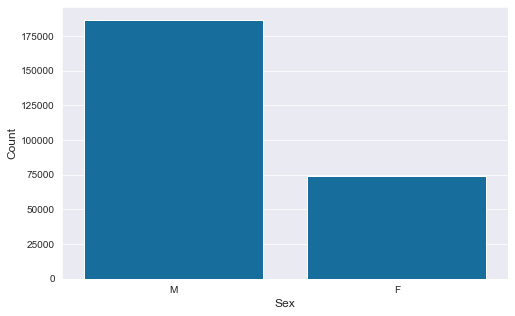

In [40]:
sb.set_style('darkgrid')
base_color = sb.color_palette('colorblind')[0]
plt.figure(figsize=[8,5])
sb.countplot(data = df_new, x = 'Sex', color = base_color)
plt.xlabel('Sex', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> As expected, there are far more males in this dataset than females especially since females could not participate in the Olympic Games for many years.

Let's now take a look at the distribution of the ages of these athletes.

In [41]:
df_new.Age.describe()

count    260416.000000
mean         25.454776
std           6.163869
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

> Apparently the oldest athlete is 97 years old, which is very odd. According to Google, the oldest athlete in the Olympics was 72 years old. We must clean this before continueing with the exploration.

In [42]:
df_new = df_new.query("Age <= 72")

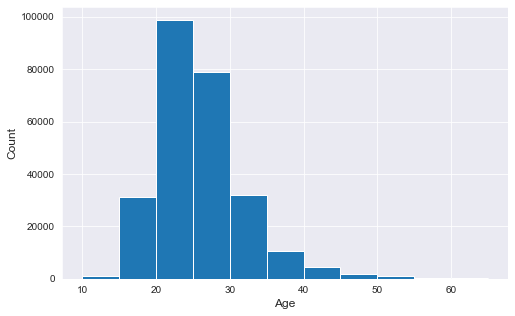

In [43]:
plt.figure(figsize = [8,5])
bins = np.arange(10,70,5)
plt.hist(data = df_new, x = 'Age', bins = bins)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> It is clear that most Olympic athletes are between 20 and 25 years of age. This is expected as many young athletes come and compete at the olympics. The youngest athlete to compete was 10 years old! We must notice that this dataset happens to be missing the oldest athlete to compete, which was Oscar Gomer Swahn at 72 years old.

Another insight we can observe is the top countries who have won the most medals overall in this dataset

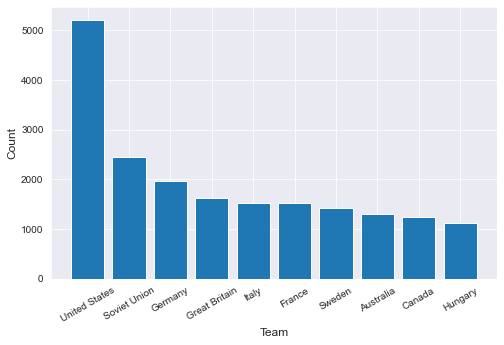

In [44]:
awarded = df_new[df_new['Medal'].notnull()]
top_teams = awarded.Team.value_counts()[:10]
plt.figure(figsize = [8,5])
plt.bar(top_teams.index, top_teams.values)
plt.xticks(rotation = 30)
plt.xlabel('Team', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> It is clear that the United States has by far the most Olympic medals with the Soviet Union being seconds and Germany at third.

Another key feature to look into is the distribution of athlete heights in the data.

In [45]:
df_new.Height.describe()

count    260392.000000
mean        175.271245
std          10.580786
min           0.000000
25%         169.000000
50%         176.000000
75%         180.000000
max         226.000000
Name: Height, dtype: float64

In [46]:
height_df = df_new.query("Height > 0")
height_df.Height.describe()

count    260225.000000
mean        175.383726
std           9.607159
min         127.000000
25%         169.000000
50%         176.000000
75%         180.000000
max         226.000000
Name: Height, dtype: float64

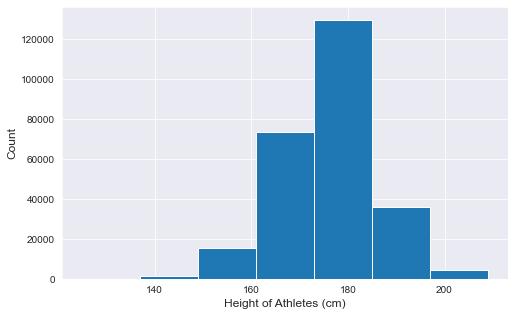

In [47]:
plt.figure(figsize=[8,5])
bins = np.arange(125,220,12)
plt.hist(data = height_df, x = 'Height', bins = bins)
plt.xlabel('Height of Athletes (cm)', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> It is clear that the majority of the athetes in this dataset are around 170 - 180 centimeters tall. It will be interesting to see how the average height of Olympic athletes has changed over time.

Finally, let's obsrve the distribution of the weight of athletes in the data.

In [48]:
df_new.Weight.describe()

count    260392.000000
mean         70.820494
std          13.144780
min           0.000000
25%          62.000000
50%          72.000000
75%          76.000000
max         214.000000
Name: Weight, dtype: float64

In [49]:
weight_df = df_new.query("Weight > 0")
weight_df.Weight.describe(percentiles = [.99])

count    260225.000000
mean         70.865943
std          13.025947
min          25.000000
50%          72.000000
99%         110.000000
max         214.000000
Name: Weight, dtype: float64

In [50]:
weight_df.Weight.value_counts(ascending = True)

175        1
151        1
198        1
190        1
149        1
       ...  
70      9647
60      9700
75     10268
72     17208
73     30452
Name: Weight, Length: 143, dtype: int64

In [51]:
weight_df.query("Weight == 214")

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
22136,12177,"Ricardo Blas, Jr.",M,21,183,214,Guam,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
22137,12177,"Ricardo Blas, Jr.",M,25,183,214,Guam,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN


> While this wieght of 214 kg did seem like an odd outlier, Ricardo Blas Jr has weighed over 210 kg and is the heaviest Olympic athlete of all time

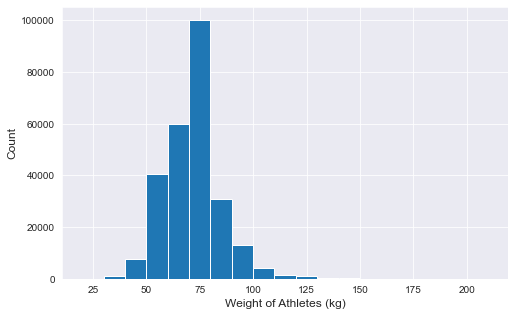

In [52]:
plt.figure(figsize=[8,5])
bins = np.arange(20,220,10);
plt.hist(data = weight_df, x = 'Weight', bins = bins)
plt.xlabel('Weight of Athletes (kg)', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

>  There are some outliers scattered from 125 kg to 214 kg that are obviously not as prevalent in the data as we can see in the histogram above. Most Olympic athletes weigh around 75 kg, but it will be interesting to see how the average weight has changed over time and how it varies between genders.

### Impressions of the Data

> The univariate exploration basically provided an introductory look at the main variables of interest. As expected, there are far more male athletes than female athletes in this dataset given the fact that women have not had the same opportunities that men have had to participate in the Olympic Games. From the age distribution, it is clear that most Olympic athletes are between 20 and 25 years old. The youngest athlete was 10 years old and the oldest was 72 years old. There were some data entries with ages above 72 that were deleted. It is also important to note that this dataset is missing the athlete that competed at 72 years old. Finally, it was found that the United States has won the most medals of all time in the Olympics. The Soviet Union is second and Germany is third. Most athletes are around 170 - 180 centimeters tall and weigh around 75 kg. There are some astonishing outliers in this data that turned out to be accurate, such as Ricardo Blas Jr. who is the heaviest Olympic athlete of all time at a whopping 214 kg.

## Bivariate Exploration

> In this section, we will  investigate relationships between pairs of variables in the
data to gain more detailed insights.

Let's start off by taking a look at the number of male and female athletes in the Olympics over time.

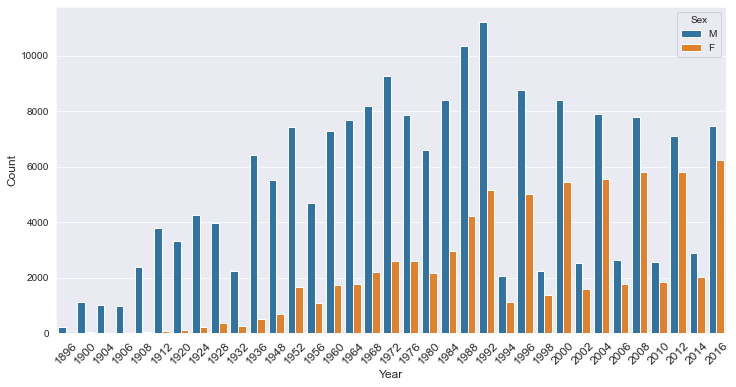

In [53]:
plt.figure(figsize = [12,6])
sb.countplot(data = df_new, x = 'Year', hue = 'Sex')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> The plot above shows that from 1896 to 1952, there were little to no female Olympians. However, as time went on, more and more female athletes started to compete. In 2016, The number of male and female athletes were almost even and both genders had over 6,000 athletes competing. Notice that after 1992, the total numbers of athletes start to alternate between high and low, while the highs are not as high as in the past. This is because the Summer and Winter Olympic Games began to stagger in when they took place.

We will now observe if the average age for male and female athletes differ.

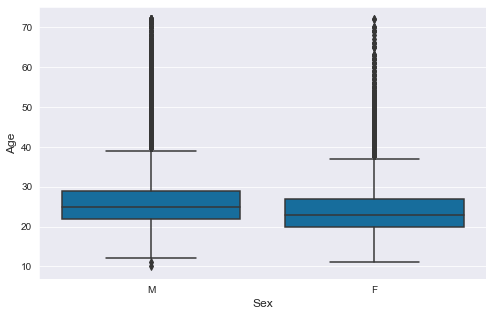

In [54]:
plt.figure(figsize = [8,5])
sb.boxplot(data = df_new, x = 'Sex', y = 'Age', color = base_color)
plt.xlabel('Sex', fontsize = 12)
plt.ylabel('Age', fontsize = 12);

> The age distribution for each gender is very similar, however it is interesting to note that the average female athlete is younger than the average male athlete in the Olympics.

Now we will observe the distribution of height between males and females.

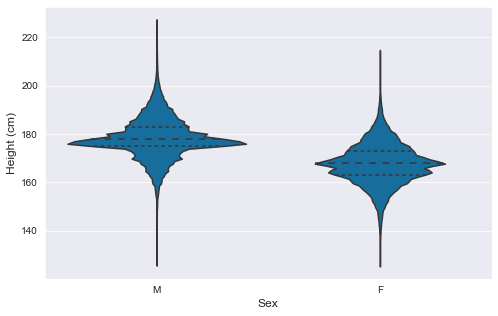

In [55]:
plt.figure(figsize = [8,5])
sb.violinplot(data = height_df, x = 'Sex', y = 'Height', inner = 'quartile', color = base_color)
plt.xlabel('Sex', fontsize = 12)
plt.ylabel('Height (cm)', fontsize = 12);

> Males tend to be taller than females and most male athletes are just under 180 cm tall, while most females are around 165 to 175 cm tall. Most of the talles athletes to ever compete in the Olympic Games were males. We must still keep in mind that more males have competed in these games over time since femalse did not have the same opportunities early on.

Let's take a look at the distribtuion of weight between these genders.

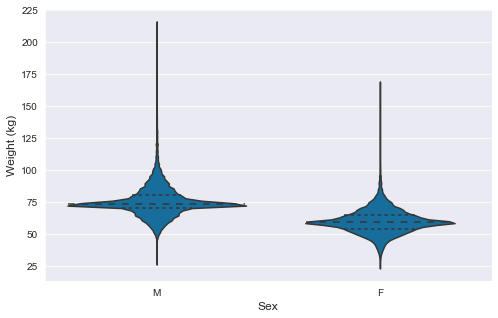

In [56]:
plt.figure(figsize = [8,5])
sb.violinplot(data = weight_df, x = 'Sex', y = 'Weight', inner = 'quartile', color = base_color)
plt.xlabel('Sex', fontsize = 12)
plt.ylabel('Weight (kg)', fontsize = 12);

> Males are overall heavier than females and the heaviest athlete was a male. However, an interesting point revealed by the plot above is that the heaviest female athlete was roughly 170 kg!

The previous plots have brough up some intriguing questions: how have the average heights and weights of Olympic athletes changed over time? Let's find out by starting with the average height over every other Olympic year.

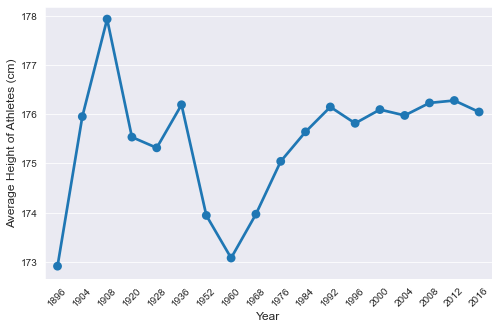

In [57]:
plt.figure(figsize=[8,5])
heights = height_df.groupby('Year').mean()['Height'].values
heights = heights[0: :2]
years = height_df.groupby('Year').mean()['Height'].index
years = years[0: :2]
sb.pointplot(x = years, y = heights);
plt.xticks(rotation = 45)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average Height of Athletes (cm)', fontsize = 12);

> There is no overall stable trend over all years in the plot above. However, from the 1960 to 1992, the average height of athletes has increased steadily and from 1992 onward, the change in average height has stagnated.

Now let's observe the average weight over the years.

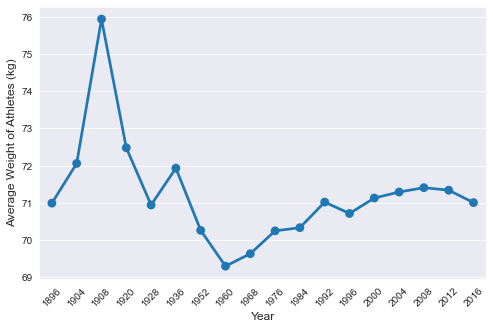

In [58]:
plt.figure(figsize=[8,5])
weights = weight_df.groupby('Year').mean()['Weight'].values
weights = weights[0: :2]
years = weight_df.groupby('Year').mean()['Weight'].index
years = years[0: :2]
sb.pointplot(x = years, y = weights);
plt.xticks(rotation = 45)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average Weight of Athletes (kg)', fontsize = 12);

> The plot for the average weight over time looks very similar to that of the average height. Oncer again, the only steady trend in the plot is a steady increase from 1960 to 1992. The graph seems to level off since thenn, however the average weight seems to be decreasing from 2008 to 2016.

## Impressions of the Data

> The bivariate exploration allowed us dive deeper into the insights found from the univariate exploration. It was found that from 1896 to 1952, there were little to no female Olympians. However, as time went on, more and more female athletes started to compete as they were given more opportunities. In 2016, The number of male and female athletes were almost even and both genders had over 6,000 athletes competing. As a whole, males were older, taller, and heavier than females, however these differences have not been drastic. The trends for the average height and weight of Olympic athletes over the years have only been steady since 1960 where both have steadily increased until 1992 and leveled off as of more recent years.

## Multivariate Exploration

> Finally, we will create plots of three or more variables to investigate the data even
further.

An extremely useful visualization would be a heatmap that shows how many medals each of the top 10 all time winning teams has won each year.

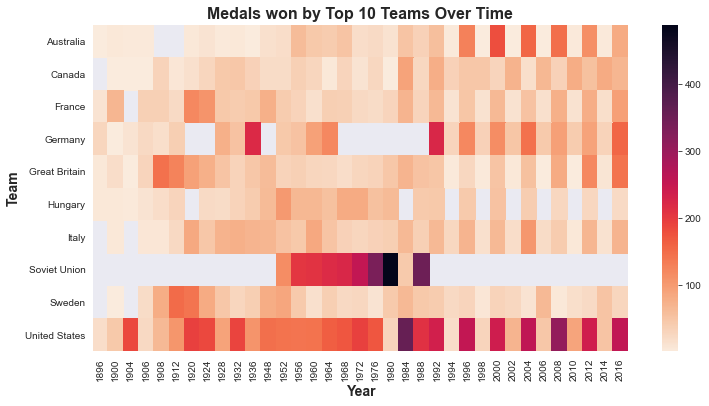

In [59]:
awarded = df_new[df_new['Medal'].notnull()]
top_teams = awarded.Team.value_counts()[:10]
top_10 = awarded[awarded['Team'].isin(top_teams.index)]
top_counts = top_10.groupby(['Team', 'Year']).size()
top_counts = top_counts.reset_index(name = 'count')
top_counts = top_counts.pivot(index = 'Team', columns = 'Year', values = 'count')

plt.figure(figsize = [12,6])
sb.heatmap(top_counts, cmap = 'rocket_r')
plt.title("Medals won by Top 10 Teams Over Time", fontsize = 16, fontweight = 'bold')
plt.xlabel('Year', fontsize = 14, fontweight = 'semibold')
plt.ylabel('Team', fontsize = 14, fontweight = 'semibold');

> The heatmap above has revealed several fascinating aspects of the data that we could not see before. It is evident that the United States has been the most consistent team over the years by winning many medals at each Olympic Games. Conversely, the Soviet Union has not been consistent over time. They did not win as many medals relatively other than an extremely powerful stretch from 1952 to 1988. They had by far the most dominant year than any other team has ever had when they won the most medals in 1990.

Finally, with multiple variables in our plots, we can observe how the average age of the Olympic Athlete has changed over time for each gender.

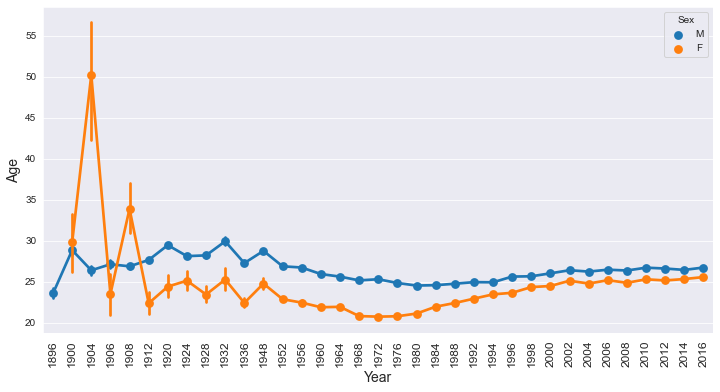

In [60]:
plt.figure(figsize = [12,6])
sb.pointplot(data = df_new, x = 'Year', y = 'Age', hue = 'Sex')
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Age', fontsize = 14);

> First of all we notice that the first female Olympian competed in 1900 and the average ages for these female athletes were rather high in the first few Omympic games. This is primarily due to the fact that there considerably less female athletes competing in these early years. This is also portrayed by the vertical error bars on these early points, which indicates that there is a high deviation for these means. This itself points to the fact that there was a relatively low number of female athletes. The average age for males, however, has been rather stagnant between 25 and 30 years old. As time went by, the average ages for both males and females became relatively close with the average female athlete slightly younger than males at around 25 years old. 

## Impressions of the Data

> Through multivariate exploration of the data, there were several captivating insights that were discovered. The heatmap displayed that the United States has been the most consistent team over the years by winning many medals at each Olympic Games. On the other hand, the Soviet Union has been the most inconsistent over time. The Soviet Union overall has not won many medals each Olympic year, but from 1952 to 1988, they absolutely dominated. They had by far the most wins than any other team has ever had in a year when they won the most medals in 1990. As for the change in the average athlete's age over time, it was found that the first female Olympian competed in 1900 and the average ages for these female athletes were rather high in the first few Omympic games since there considerably less female athletes copeting in these early years. These average ages dropped down over time and the average ages for both males and females became relatively close with the average female athlete slightly younger than males at around 25 years old. The average age for males, however, has been rather stagnant between 25 and 30 years old over all of these years.

In [61]:
# save the final tidy dataset to the clean-data.csv file
df_new.to_csv('clean-data.csv',index = False)